# Visualización de errores

Para cualquier medición científica, **contabilizar con precisión los errores** es casi tan importante, si no más, que informar con precisión del número en sí.
Por ejemplo, imagine que estoy utilizando algunas observaciones astrofísicas para estimar la constante de Hubble, la medida local de la tasa de expansión del Universo.
Sé que la literatura actual sugiere un valor de alrededor de 71 (km/s)/Mpc, y yo mido un valor de 74 (km/s)/Mpc con mi método. ¿Son consistentes los valores? La única respuesta correcta, dada esta información, es la siguiente: no hay forma de saberlo.

Supongamos que aumento esta información con incertidumbres reportadas: la literatura actual sugiere un valor de alrededor de 71 $\pm$ 2,5 (km/s)/Mpc, y mi método ha medido un valor de 74 $\pm$ 5 (km/s) /Mpc. Ahora bien, ¿son consistentes los valores? Ésta es una pregunta que puede responderse cuantitativamente.

En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que un gráfico transmita información mucho más completa.

## Barras de error básicas

Se puede crear una barra de error básica con una única llamada a la función Matplotlib:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

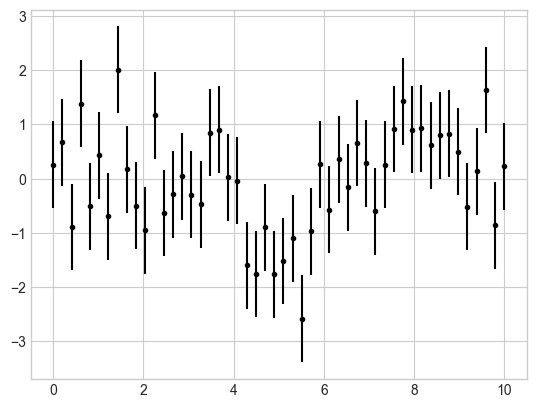

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Aquí, ``fmt`` es un código de formato que controla la apariencia de líneas y puntos, y tiene la misma sintaxis que la abreviatura utilizada en ``plt.plot``.

Además de estas opciones básicas, la función ``errorbar`` tiene muchas opciones para ajustar las salidas.
Con estas opciones adicionales, puede personalizar fácilmente la estética del gráfico de la barra de error.
A menudo es útil, especialmente en gráficos abarrotados, hacer que las barras de error sean más claras que los puntos mismos:

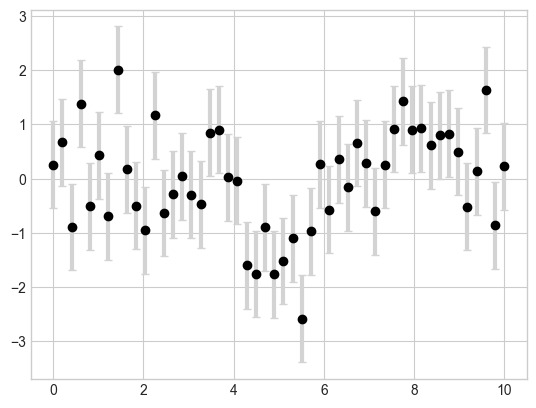

In [3]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=3);

Además de estas opciones, también puedes especificar barras de error horizontales (``xerr``), barras de error unilaterales y muchas otras variantes.
Para obtener más información sobre las opciones disponibles, consulte la documentación de ``plt.errorbar``.

# Gráficos de densidad y contorno

A veces resulta útil mostrar datos tridimensionales en dos dimensiones utilizando contornos o regiones codificadas por colores.
Hay tres funciones de Matplotlib que pueden resultar útiles para esta tarea: ``plt.contour`` para gráficos de contornos, ``plt.contourf`` para gráficos de contornos rellenos y ``plt.imshow`` para mostrar imágenes.
Esta sección analiza varios ejemplos de su uso. Comenzaremos configurando el cuaderno para visualizar e importar las funciones que usaremos:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

## Visualizando una función tridimensional

Comenzaremos demostrando un gráfico de contorno usando una función $z = f(x, y)$, usando la siguiente opción particular para $f$:

In [5]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Se puede crear una gráfica de contorno con la función ``plt.contour``.
Se necesitan tres argumentos: una cuadrícula de valores *x*, una cuadrícula de valores *y* y una cuadrícula de valores *z*.
Los valores *x* e *y* representan posiciones en el gráfico, y los valores *z* estarán representados por los niveles de contorno.
Quizás la forma más sencilla de preparar dichos datos sea utilizar la función ``np.meshgrid``, que construye cuadrículas bidimensionales a partir de matrices unidimensionales:

In [6]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Ahora veamos esto con un gráfico de contorno de línea estándar:

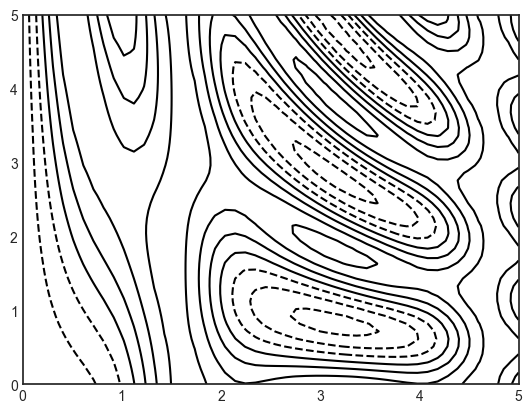

In [7]:
plt.contour(x, y, Z, colors='black');

Tenga en cuenta que, de forma predeterminada, cuando se utiliza un solo color, los valores negativos se representan con líneas discontinuas y los valores positivos con líneas continuas.
Como alternativa, las líneas pueden codificarse por colores especificando un mapa de colores con el argumento ``cmap``.
Aquí, también especificaremos que queremos que se dibujen en 20 intervalos igualmente espaciados dentro del rango de datos (20 curvas de nivel):

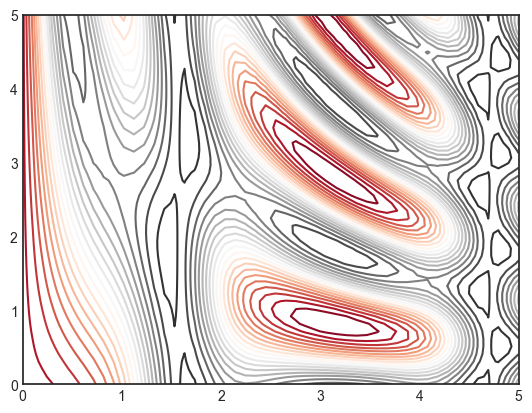

In [8]:
plt.contour(X, Y, Z, levels = 20, cmap='RdGy'); #Para colorear los bordes

Aquí elegimos el mapa de colores ``RdGy`` (abreviatura de *Rojo-Gris*), que es una buena opción para datos centrados.
Matplotlib tiene una amplia gama de mapas de colores disponibles, que puede explorar fácilmente en IPython completando la pestaña en el módulo ``plt.cm``:
```
plt.cm.<TAB>
```
Nuestra gráfica se ve mejor, pero los espacios entre líneas pueden distraer un poco.
Podemos cambiar esto cambiando a un **gráfico de contorno relleno** usando la función ``plt.contourf()`` (observe la ``f`` al final), que utiliza en gran medida la misma sintaxis que ``plt .contour()``.

Además, agregaremos un comando ``plt.colorbar()``, que crea automáticamente un eje adicional con información de color etiquetada para la gráfica:

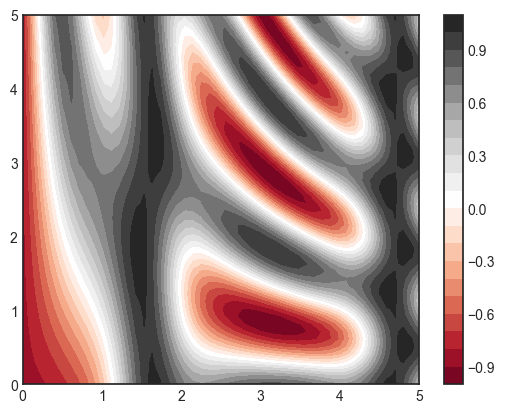

In [10]:
plt.contourf(X, Y, Z, 20, cmap='RdGy') #colorear el interior
plt.colorbar();

La barra de colores deja claro que las **regiones negras son "picos", mientras que las regiones rojas son "valles".**

Un problema potencial con esta gráfica es que está un poco "manchada". Es decir, los **pasos de color son discretos en lugar de continuos**, lo que no siempre es lo que se desea.
Esto podría solucionarse estableciendo el número de contornos en un número muy alto, pero esto da como resultado un gráfico bastante **ineficiente**: Matplotlib debe representar un nuevo polígono para cada paso en el nivel.
Una mejor manera de manejar esto es usar la función ``plt.imshow()``, que interpreta una cuadrícula bidimensional de datos como una imagen.

El siguiente código muestra esto:

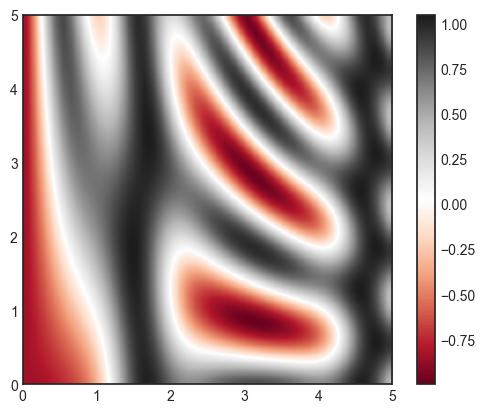

In [11]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', interpolation='gaussian') #suaviza los bordes para que el cambio entre superficies no sea tan dastrico
plt.colorbar()

Sin embargo, existen algunos problemas potenciales con ``imshow()``:

- ``plt.imshow()`` no acepta una cuadrícula *x* e *y*, por lo que debes especificar manualmente la *extensión* [*xmin*, *xmax*, *ymin*, *ymax*] de la imagen en la gráfica.
- ``plt.imshow()`` por defecto sigue la definición de matriz de imágenes estándar donde el origen está en la parte superior izquierda, no en la parte inferior izquierda como en la mayoría de los gráficos de contorno. Esto debe cambiarse cuando se muestran datos cuadriculados.

Finalmente, a veces puede resultar útil combinar gráficos de contorno y gráficos de imágenes.
Por ejemplo, aquí usaremos una imagen de fondo parcialmente transparente (con la transparencia configurada mediante el parámetro ``alpha``) y superpondremos contornos con etiquetas en los propios contornos (usando la función ``plt.clabel()``):

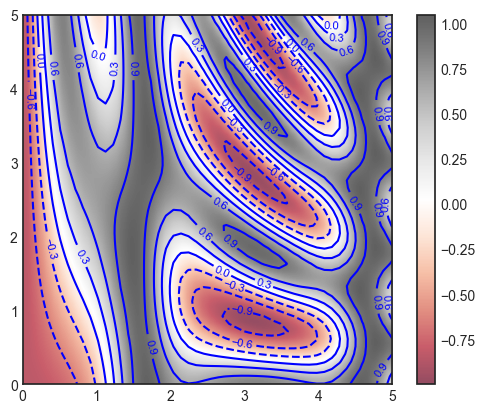

In [19]:
contours = plt.contour(X, Y, Z, 6, colors='blue') #el numero despues de las coordenadas indica las curbas que queremos
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.7, interpolation='gaussian')
plt.colorbar();

La combinación de estas tres funciones—``plt.contour``, ``plt.contourf`` y ``plt.imshow``—ofrece posibilidades casi ilimitadas para mostrar este tipo de datos tridimensionales dentro de una gráfica bidimensional.
Para obtener más información sobre las opciones disponibles en estas funciones, consulte sus documentaciones.
Si está interesado en visualizaciones tridimensionales de este tipo de datos, consulte ([3D plotting](https://matplotlib.org/stable/gallery/mplot3d/index.html))